In [1]:
import ckanapi

import seaborn as sns
import pandas as pd
import matplotlib as plt

sns.set(rc={'figure.figsize':(16, 12)})

In [2]:
ckan = ckanapi.RemoteCKAN(**{
    'address': 'https://ckanadmin0.intra.dev-toronto.ca',
    'apikey': '784f11cc-b170-4377-83a3-38ba28662b16'
})

In [3]:
# for r in ckan.action.package_show(id='catalogue-quality-scores')['resources']:
#     ckan.action.resource_delete(id=r['id'])

In [9]:
def read_datastore(ckan, rid, rows=10000):
    records = []
    
    is_geospatial = False
    
    has_more = True
    while has_more:
        result = ckan.action.datastore_search(id=rid, limit=rows, offset=len(records))
        
        records += result['records']
        has_more = len(records) < result['total']
    
    df = pd.DataFrame(records).drop('_id', axis=1)
    
    if 'geometry' in df.columns:
        df['geometry'] = df['geometry'].apply(lambda x: shape(json.loads(x)))
        
        df = gpd.GeoDataFrame(df, crs={'init': 'epsg:4326'})
    
    return df, [x for x in result['fields'] if x['id'] != '_id']

In [10]:
df, _ = read_datastore(ckan, '6fe57e65-3cf3-4390-817d-2353bfdcba13')
df = df.sort_values(by='grade_norm', axis=0)

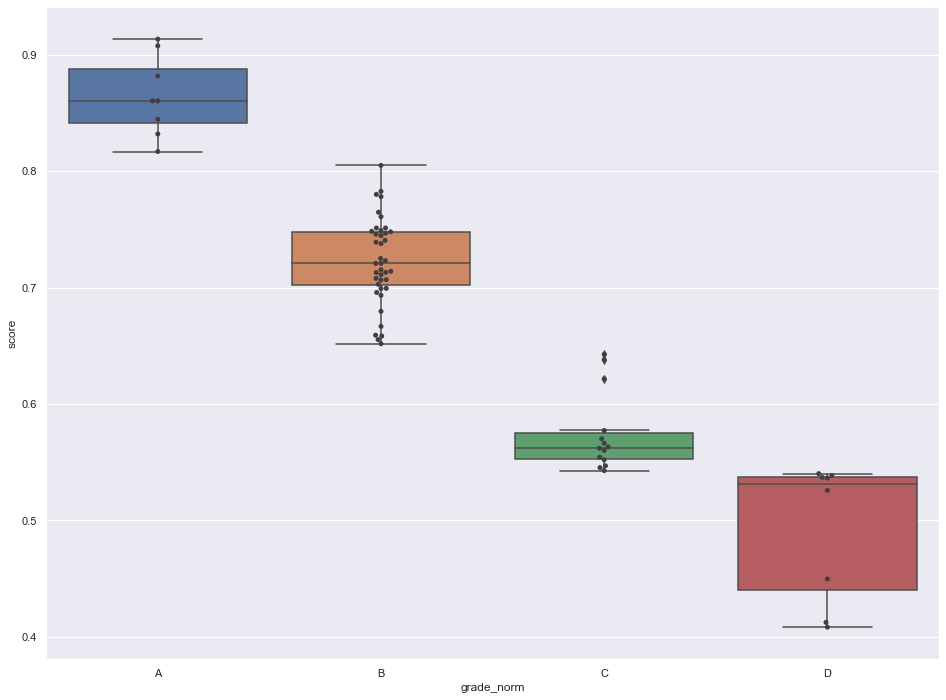

In [11]:
ax = sns.boxplot(x="grade_norm", y="score", data=df)
ax = sns.swarmplot(x="grade_norm", y="score", data=df, color=".25")

In [27]:
df['grade_norm_new'] = pd.cut(df['score_norm'], bins=[-1, .6, .8, 1], labels=['C','B','A'])

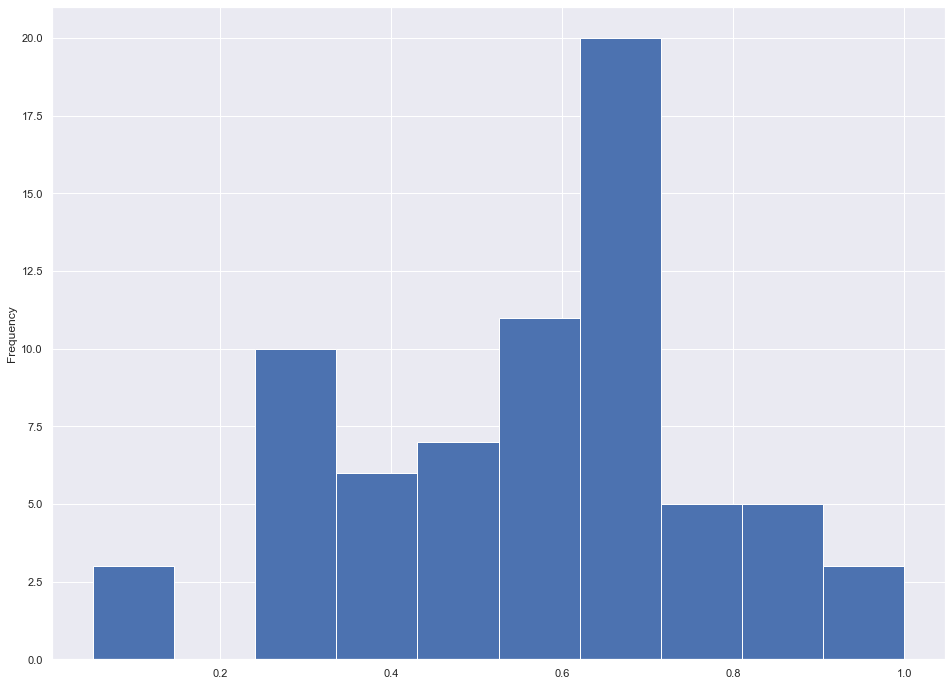

In [26]:
df['score_norm'].plot(kind='hist')